# Agro-Food CO2 Emission

## About Dataset

The agricultural CO2 emission dataset has been constructed by merging and reprocessing approximately a dozen individual datasets from the Food and Agriculture Organization (FAO) and data from IPCC. These datasets were, cleaned, preprocessed and merged together to create a comprehensive and cohesive dataset for analysis and forecasting purposes.

The dataset, as demonstrated in the notebook, describes CO2 emissions related to agri-food, which amount to approximately 62% of the global annual emissions.

Indeed, the emissions from the agri-food sector are significant when studying climate change. As the dataset shows, these emissions contribute to a substantial portion of the global annual emissions. Understanding and addressing the environmental impact of the agri-food industry is crucial for mitigating climate change and developing sustainable practices within this sector.

### Key Features:

    Savanna fires: Emissions from fires in savanna ecosystems.
    Forest fires: Emissions from fires in forested areas.
    Crop Residues: Emissions from burning or decomposing leftover plant material after crop harvesting.
    Rice Cultivation: Emissions from methane released during rice cultivation.
    Drained organic soils (CO2): Emissions from carbon dioxide released when draining organic soils.
    Pesticides Manufacturing: Emissions from the production of pesticides.
    Food Transport: Emissions from transporting food products.
    Forestland: Land covered by forests.
    Net Forest conversion: Change in forest area due to deforestation and afforestation.
    Food Household Consumption: Emissions from food consumption at the household level.
    Food Retail: Emissions from the operation of retail establishments selling food.
    On-farm Electricity Use: Electricity consumption on farms.
    Food Packaging: Emissions from the production and disposal of food packaging materials.
    Agrifood Systems Waste Disposal: Emissions from waste disposal in the agrifood system.
    Food Processing: Emissions from processing food products.
    Fertilizers Manufacturing: Emissions from the production of fertilizers.
    IPPU: Emissions from industrial processes and product use.
    Manure applied to Soils: Emissions from applying animal manure to agricultural soils.
    Manure left on Pasture: Emissions from animal manure on pasture or grazing land.
    Manure Management: Emissions from managing and treating animal manure.
    Fires in organic soils: Emissions from fires in organic soils.
    Fires in humid tropical forests: Emissions from fires in humid tropical forests.
    On-farm energy use: Energy consumption on farms.
    Rural population: Number of people living in rural areas.
    Urban population: Number of people living in urban areas.
    Total Population - Male: Total number of male individuals in the population.
    Total Population - Female: Total number of female individuals in the population.
    total_emission: Total greenhouse gas emissions from various sources.
    Average Temperature °C: The average increasing of temperature (by year) in degrees Celsius,


### Note

    CO2 is recorded in kilotons (kt): 1 kt represents 1000 kg of CO2.
    The feature "Average Temperature C°", which can be used as the target for machine learning models, represents the average yearly temperature increase. For example, if it is 0.12, it means that the temperature in that specific location increased by 0.12 degrees Celsius.
    Forestland is the only feature that exhibits negative emissions due to its role as a carbon sink. Through photosynthesis, forests absorb and store carbon dioxide, effectively removing it from the atmosphere. Sustainable forest management, along with afforestation and reforestation efforts, further contribute to negative emissions by increasing carbon sequestration capacity.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,20)
import random
import seaborn as sns
import matplotlib.cm as cm
import pycountry as pctry 

In [3]:
df = pd.read_csv('Agrofood_co2_emission.csv')
df.head()

,Area,Year,Savanna_fires,Forest_fires,Crop_Residues,Rice_Cultivation,Drained_organic_soils_(CO2),Pesticides_Manufacturing,Food_Transport,Forestland,...,Manure_Management,Fires_in_organic_soils,Fires_in_humid_tropical_forests,On-farm_energy_use,Rural_population,Urban population,Total_Population_Male,Total_Population_Female,total_emission,Average_Temperature_C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


In [4]:
df.isna().sum()

Area                                  0
Year                                  0
Savanna_fires                        31
Forest_fires                         93
Crop_Residues                      1389
Rice_Cultivation                      0
Drained_organic_soils_(CO2)           0
Pesticides_Manufacturing              0
Food_Transport                        0
Forestland                          493
Net_Forest_conversion               493
Food_Household_Consumption          473
Food_Retail                           0
On-farm_Electricity_Use               0
Food_Packaging                        0
Agrifood_Systems_Waste_Disposal       0
Food_Processing                       0
Fertilizers_Manufacturing             0
IPPU                                743
Manure_applied_to_Soils             928
Manure_left_on_Pasture                0
Manure_Management                   928
Fires_in_organic_soils                0
Fires_in_humid_tropical_forests     155
On-farm_energy_use                  956


In [5]:
df.fillna(0, inplace = True)

In [152]:
df = df[df['Area'] != 'China']

In [153]:
continents = {
    'Africa': ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', 'Côte d\'Ivoire', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'São Tomé and Príncipe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe'],
    'Asia': ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen'],
    'Europe': ['Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Vatican City'],
    'North America': ['Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States'],
    'Oceania': ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu'],
    'South America': ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
}


# Add the countries to the dictionary, grouped by region.
world_regions = {
    "Western Europe" : ["Austria", "Belgium", "France", "Germany", "Liechtenstein", "Luxembourg", "Monaco", "Netherlands", "Switzerland"],
    "Northern Europe" : ["Denmark", "Norway", "Sweden", "Finland", "Iceland", "Estonia", "Ireland", "Latvia", "Lithuania", "United Kingdom"],
    "Southern Europe" : ["Albania","Andorra","Bosnia and Herzegovina","Croatia","Greece","Holy See","Italy","Malta","Montenegro","North Macedonia","Portugal","San Marino","Serbia","Slovenia", "Spain"],
    "Eastern Europe" : ["Russia", "Ukraine", "Poland", "Romania", "Bulgaria", "Belarus"],
    "Central Europe" : ["Czech Republic", "Croatia", "Hungary", "Serbia", "Slovakia", "Slovenia"],

    "Southwest Asia" : ["Iran", "Iraq", "Saudi Arabia", "United Arab Emirates", "Israel"],
    "Oceania" : ["Australia", "New Zealand", "Papua New Guinea", "Fiji", "Vanuatu"],
    "Central America" : ["Mexico", "Guatemala", "Belize", "Honduras", "Nicaragua"],
    "South America" : ["Brazil", "Argentina", "Colombia", "Peru", "Venezuela"],
    "North America" : ["United States", "Canada", "Mexico"],
    "Africa" : ["Nigeria", "Egypt", "South Africa", "Algeria", "Morocco"],
    "Southeast Asia" : ["Thailand", "Malaysia", "Indonesia", "Vietnam", "Philippines"],
    "East Asia" : ["China", "Japan", "South Korea", "North Korea", "Mongolia"],
    "South Asia" : ["India", "Pakistan", "Bangladesh", "Sri Lanka", "Nepal"],
    "Central Asia" : ["Kazakhstan", "Kyrgyzstan", "Tajikistan", "Turkmenistan", "Uzbekistan"],
    "Western Asia" : ["Turkey", "Lebanon", "Syria", "Iraq", "Iran"],
    "Caribbean" : ["Cuba", "Haiti", "Dominican Republic", "Jamaica", "Trinidad and Tobago", "Barbados", "Antigua and Barbuda"],
    "Melanesia" : ["Papua New Guinea", "Solomon Islands", "Vanuatu", "New Caledonia", "Federated States of Micronesia"],
    "Micronesia" : ["Palau", "Nauru", "Kiribati", "Marshall Islands"],
    "Polynesia" : ["New Zealand", "French Polynesia", "Tonga", "Samoa", "Cook Islands"]
    }


def assign_continent(area):
    for continent, country in continents.items():
        if area in country:
            return continent

df['Continent'] = df['Area'].apply(assign_continent)

<ipython-input-153-251a294dc705>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Continent'] = df['Area'].apply(assign_continent)


In [191]:
df['total_population'] = df['Total_Population_Male'] + df['Total_Population_Female']

<ipython-input-191-e64990488f60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_population'] = df['Total_Population_Male'] + df['Total_Population_Female']


<ipython-input-155-28b4c106e974>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_year = df.groupby('Year')['total_emission','Average_Temperature_C'].mean()
<ipython-input-155-28b4c106e974>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_pop = df.groupby('Year')['Total_Population_Male','Total_Population_Female'].sum()


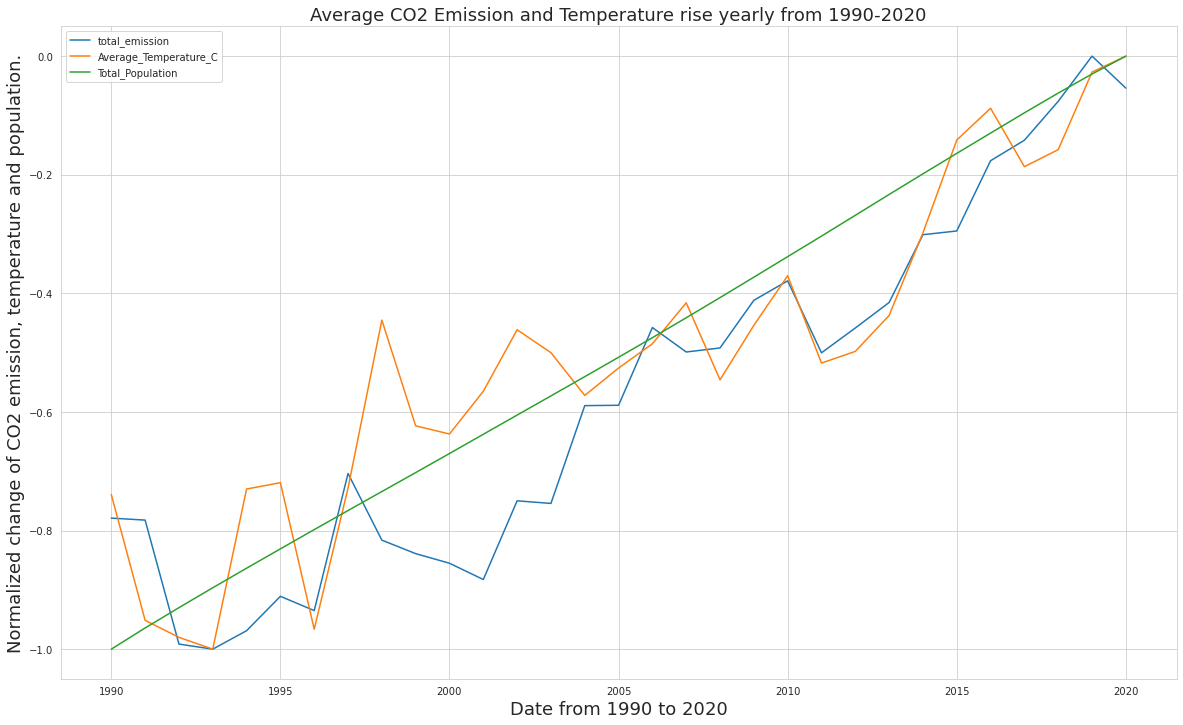

In [155]:
def normalize(df):
    n = (df-df.max())/(df.max()-df.min())
    return n

df_year = df.groupby('Year')['total_emission','Average_Temperature_C'].mean()
df_pop = df.groupby('Year')['Total_Population_Male','Total_Population_Female'].sum()
df_year['Total_Population'] = df_pop.sum(axis = 1)
df_year_norm = normalize(df_year)

df_year_norm.plot(figsize=(20, 12))
plt.title('Average CO2 Emission and Temperature rise yearly from 1990-2020', fontsize = 18)
plt.xlabel('Date from 1990 to 2020', fontsize = 18)
plt.ylabel('Normalized change of CO2 emission, temperature and population.', fontsize = 18)
plt.show()

Text(0, 0.5, 'Emission of CO2')

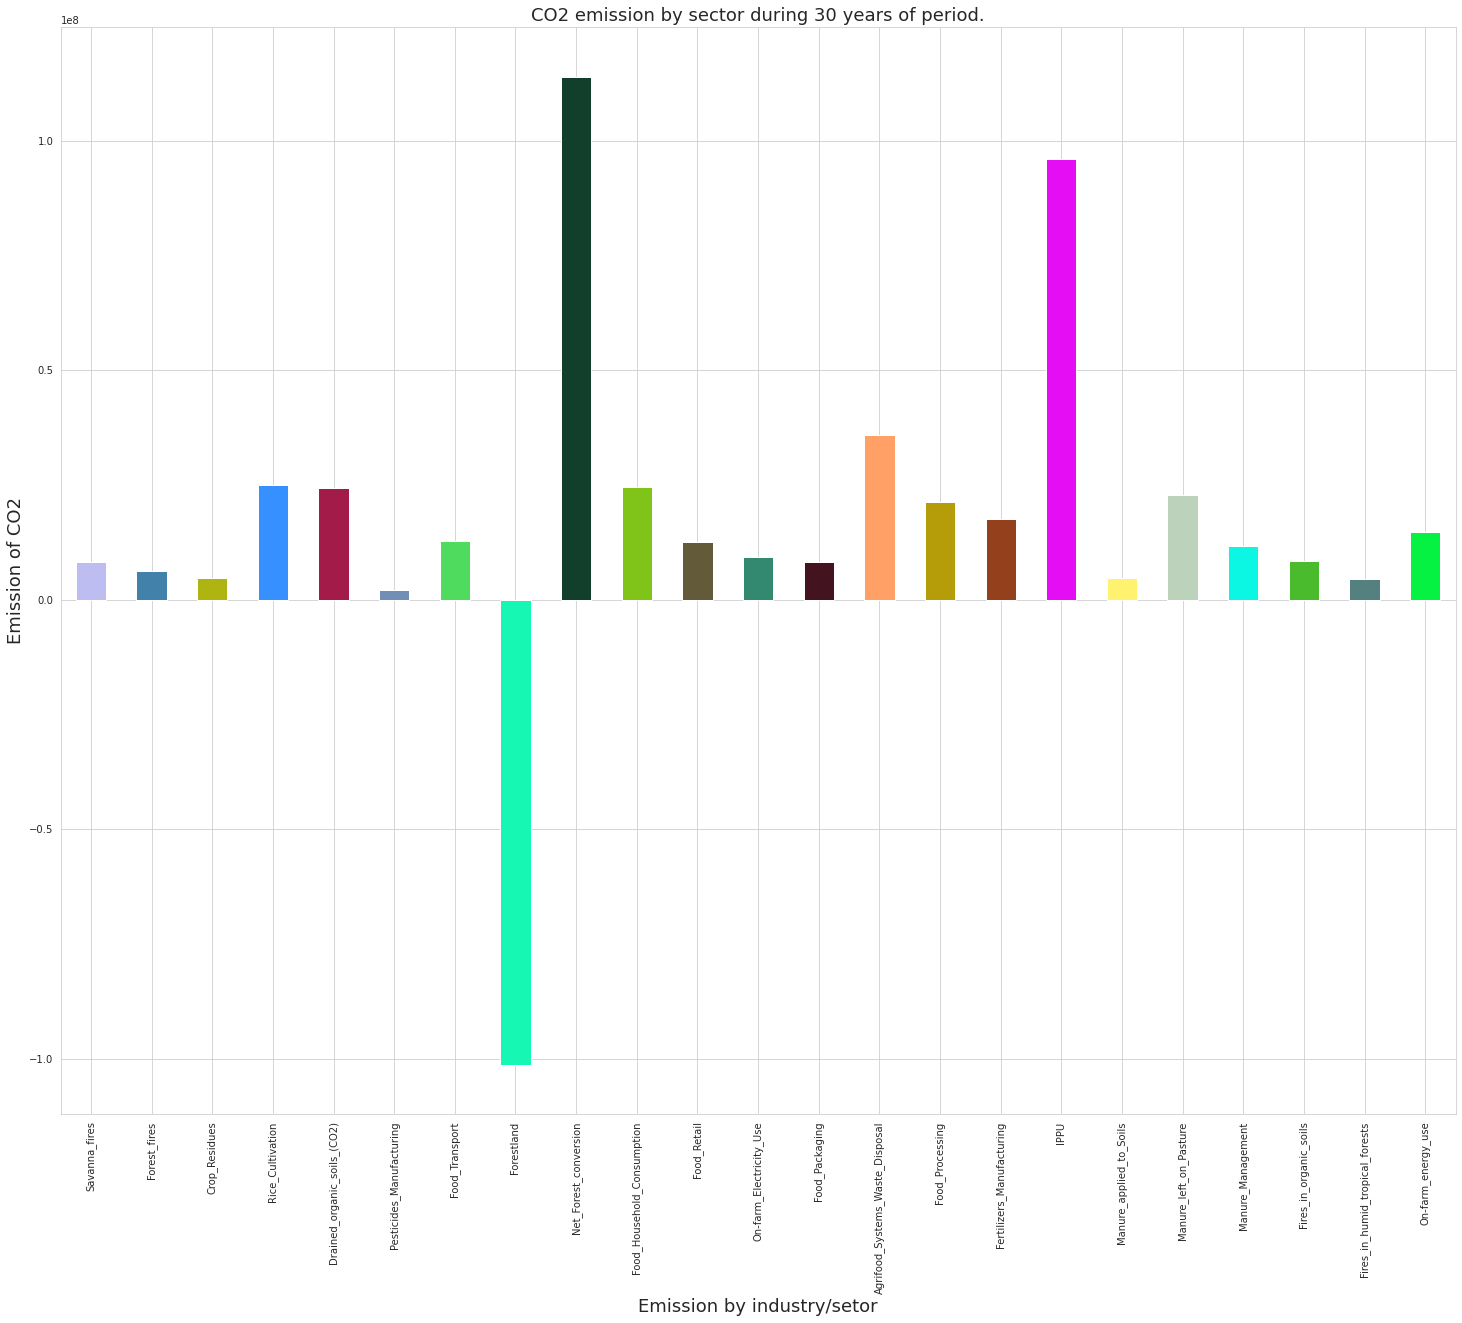

In [156]:

df_emitter = df.groupby('Year')[['Savanna_fires','Forest_fires', 'Crop_Residues',
                                 'Rice_Cultivation', 'Drained_organic_soils_(CO2)',  'Pesticides_Manufacturing',
                                 'Food_Transport', 'Forestland', 'Net_Forest_conversion',
                                 'Food_Household_Consumption', 'Food_Retail', 'On-farm_Electricity_Use',
                                 'Food_Packaging', 'Agrifood_Systems_Waste_Disposal', 'Food_Processing',
                                 'Fertilizers_Manufacturing', 'IPPU', 'Manure_applied_to_Soils',
                                 'Manure_left_on_Pasture', 'Manure_Management', 'Fires_in_organic_soils',
                                 'Fires_in_humid_tropical_forests', 'On-farm_energy_use']].sum()

df_emitter_tot = df_emitter.sum(axis = 0)
no_of_col = 23
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(no_of_col)]
df_emitter_tot.plot(kind = 'bar', figsize = (25, 20), color = colors, rot = 90)
plt.title('CO2 emission by sector during 30 years of period.', fontsize = 18)
plt.xlabel('Emission by industry/setor', fontsize = 18)
plt.ylabel('Emission of CO2', fontsize = 18)

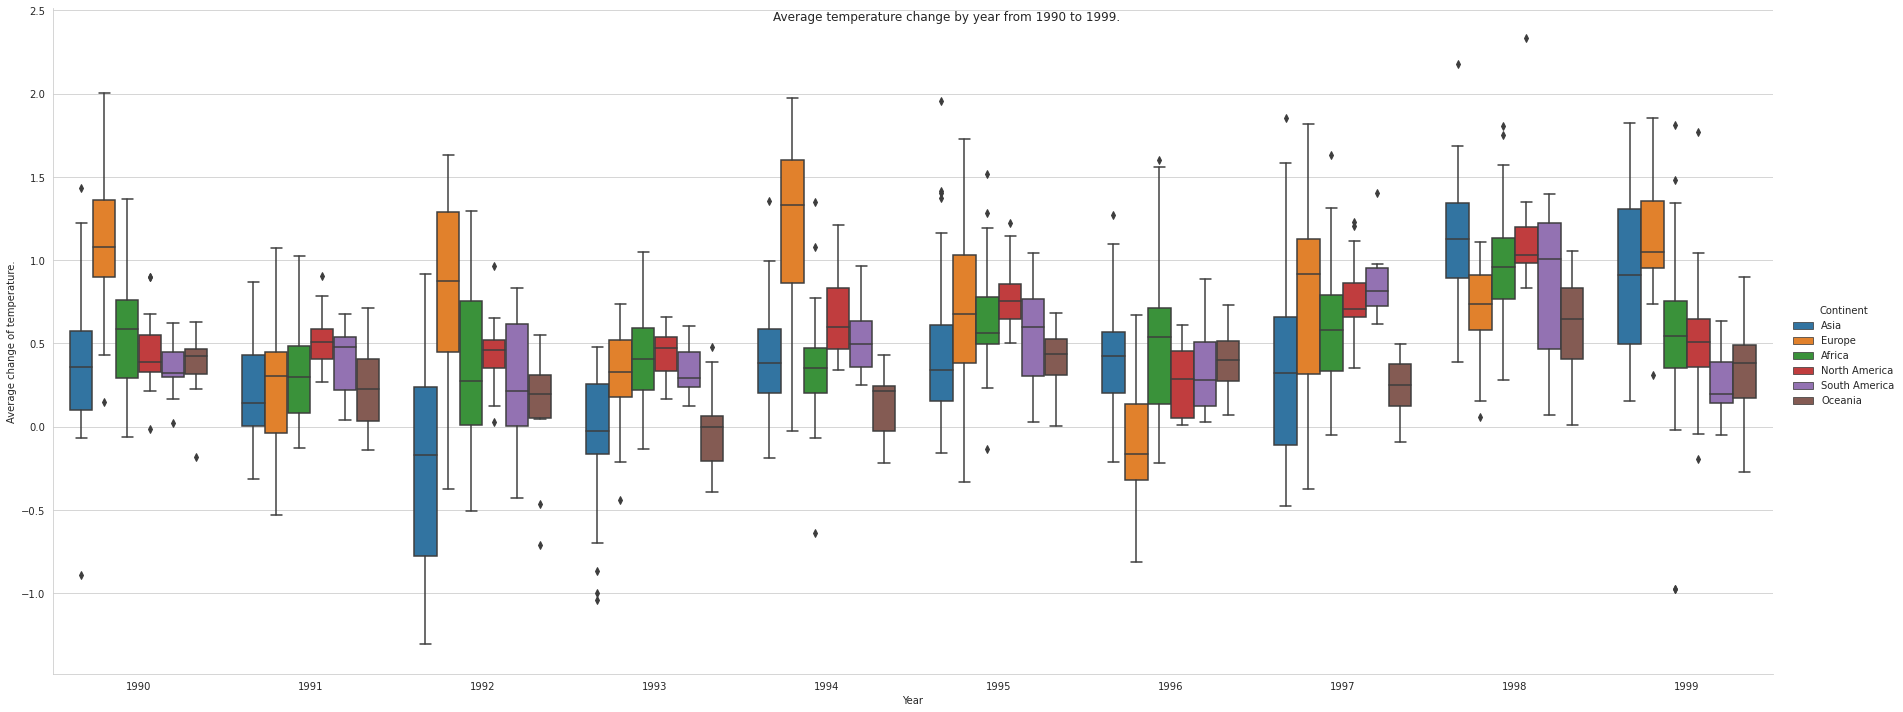

In [157]:
df_1990_1999 = df.query('Year >= 1990 and Year <= 1999')

sns.set_style('whitegrid')
g = sns.catplot(x = 'Year',
                y = 'Average_Temperature_C',
                data = df_1990_1999,
                kind = 'box',
                hue = 'Continent',
                height=10, 
                aspect=2.5
                )
g.fig.suptitle('Average temperature change by year from 1990 to 1999.')
g.set(xlabel = 'Year',
      ylabel = 'Average change of temperature.')
plt.show()

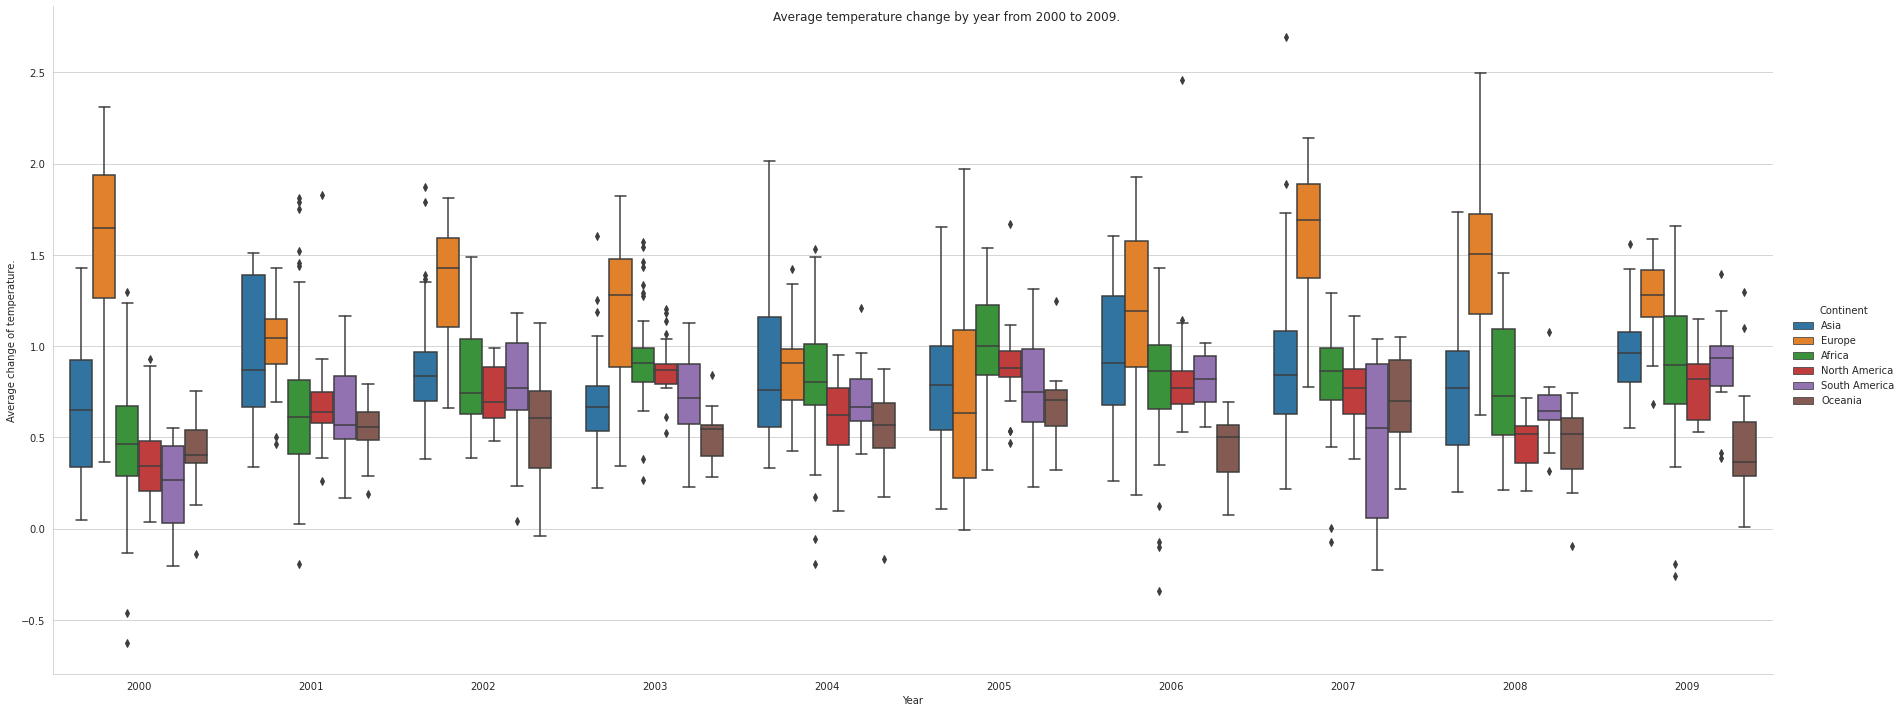

In [158]:
df_2000_2009 = df.query('Year >= 2000 and Year <= 2009')
sns.set_style('whitegrid')
g = sns.catplot(x = 'Year',
                y = 'Average_Temperature_C',
                data = df_2000_2009,
                kind = 'box',
                hue = 'Continent',
                height=10, 
                aspect=2.5
                )
g.fig.suptitle('Average temperature change by year from 2000 to 2009.')
g.set(xlabel = 'Year',
      ylabel = 'Average change of temperature.')
plt.show()

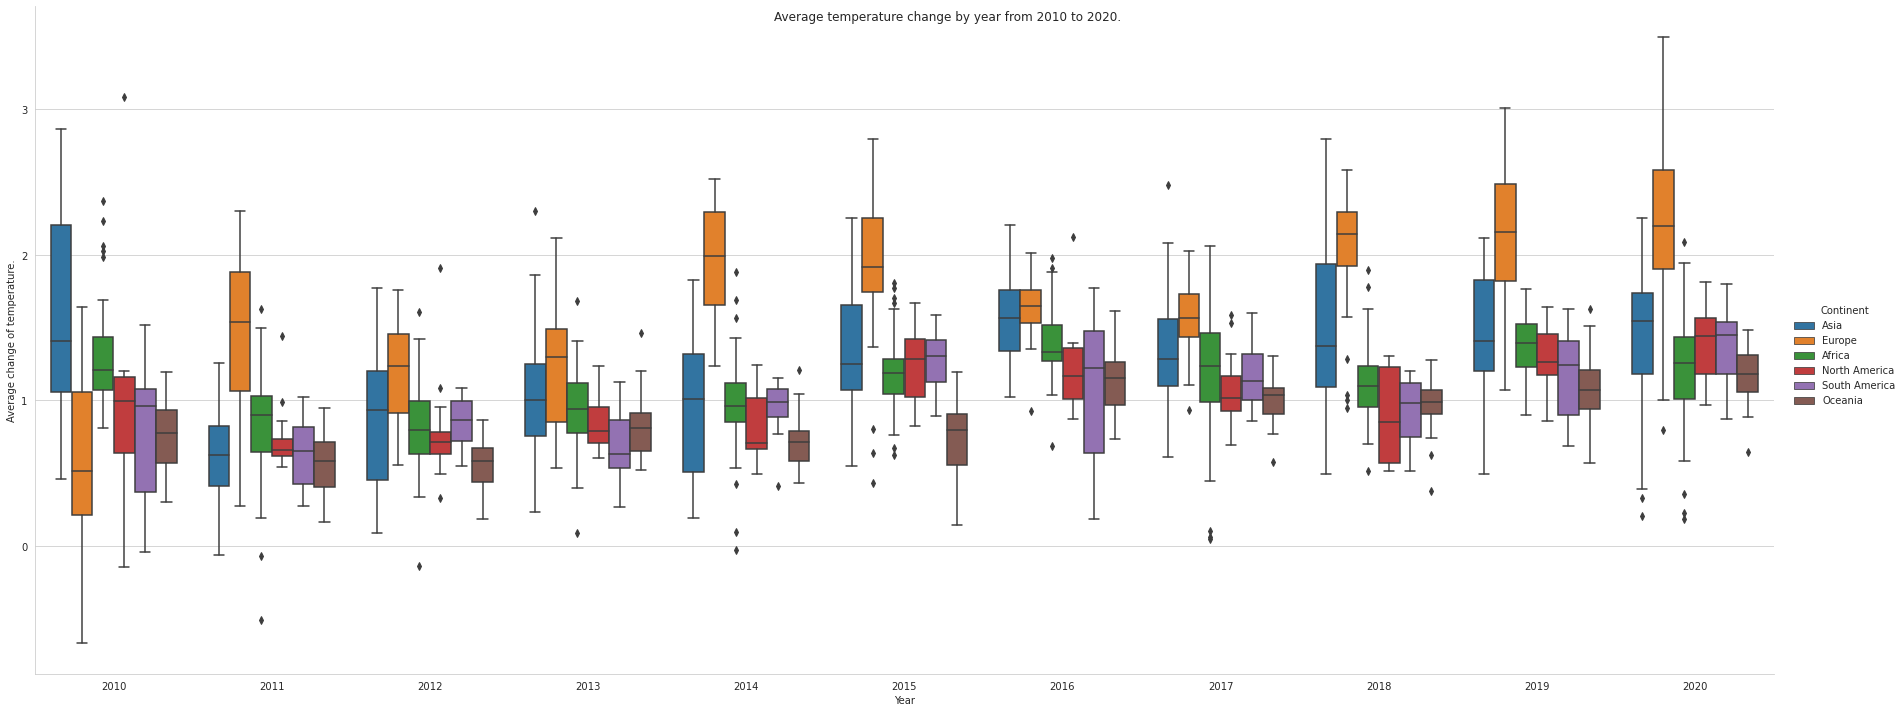

In [159]:
df_2010_2020 = df.query('Year >= 2010 and Year <= 2020')
sns.set_style('whitegrid')
g = sns.catplot(x = 'Year',
                y = 'Average_Temperature_C',
                data = df_2010_2020,
                kind = 'box',
                hue = 'Continent',
                height=10, 
                aspect=2.5
                )
g.fig.suptitle('Average temperature change by year from 2010 to 2020.')
g.set(xlabel = 'Year',
      ylabel = 'Average change of temperature.')
plt.show()

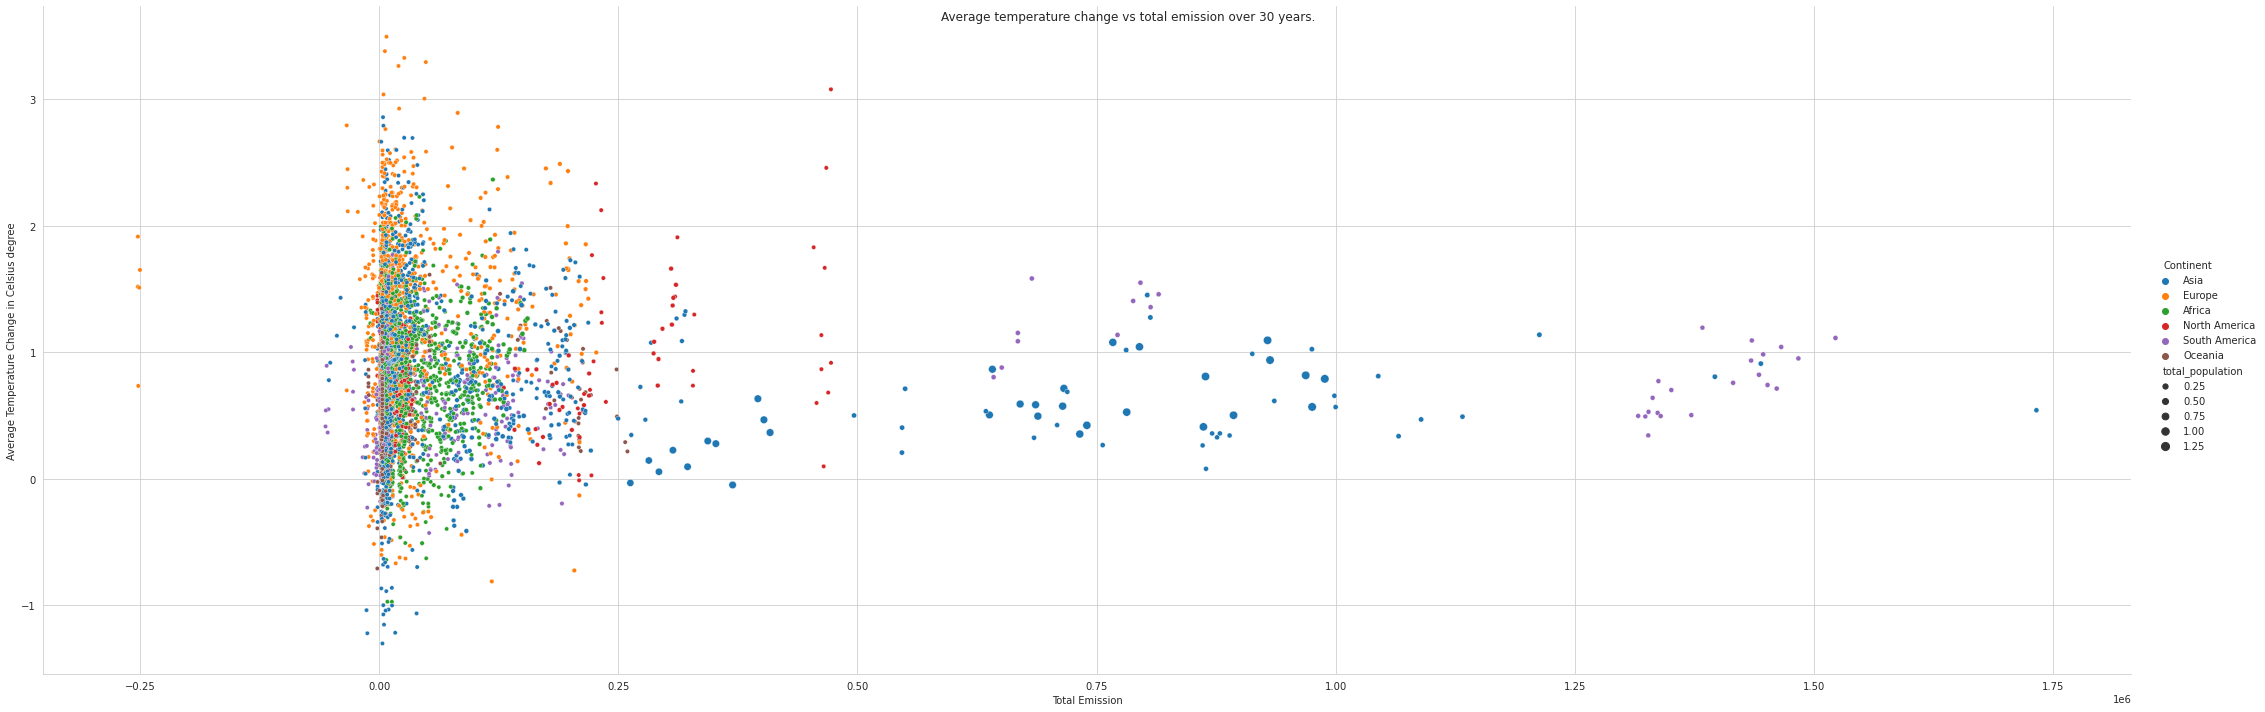

In [180]:
g = sns.relplot(x = 'total_emission',
            y = 'Average_Temperature_C',
            data = df,
            size = 'total_population',
            hue = 'Continent',
            height = 10,
            aspect = 3)
g.fig.suptitle('Average temperature change vs total emission over 30 years.')
g.set(xlabel = 'Total Emission',
      ylabel = 'Average Temperature Change in Celsius degree')
plt.show()

In [189]:
dff = df.groupby('Area')['total_emission'].sum()
dff = pd.DataFrame(dff)
dff = dff.sort_values('total_emission', ascending = False)
dff.head(10)
dff.tail(10)

,total_emission
Area,
Bhutan,-2.412280e+01
Georgia,-4.730578e+04
Latvia,-5.110531e+04
Serbia and Montenegro,-5.933866e+04
Slovenia,-6.546388e+04
Finland,-9.975058e+04
Bulgaria,-3.108318e+05
Romania,-4.778241e+05
Chile,-5.811333e+05


In [209]:
correlation = df.groupby('Year').agg({'total_emission':'sum','Average_Temperature_C':'mean','Rural_population':'sum','Urban population':'sum','total_population':'sum'})
correlation.corr()

,total_emission,Average_Temperature_C,Rural_population,Urban population,total_population
total_emission,1.000000,0.911040,0.897446,0.977526,0.973862
Average_Temperature_C,0.911040,1.000000,0.866524,0.911888,0.912830
Rural_population,0.897446,0.866524,1.000000,0.933797,0.951203
Urban population,0.977526,0.911888,0.933797,1.000000,0.998632
total_population,0.973862,0.912830,0.951203,0.998632,1.000000


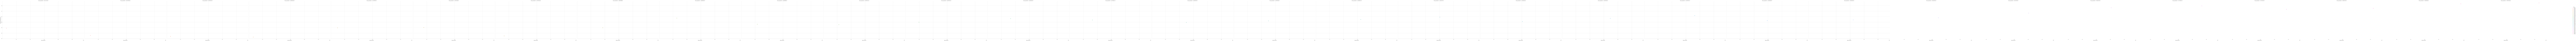

In [228]:
correlation['Year'] = correlation.index
sns.lmplot(data = correlation,
            x = 'total_emission',
            y = 'Average_Temperature_C',
            hue = 'Year',
            height = 10,
            aspect = 2,
            fit_reg = True)
plt.show()
